## Dataset1- Random Forest - Catherine
aims to train a model for predicting mobile phone prices based on various attributes, specifications, and features. The goal is to assist phone manufacturers in market research and provide a price indicator for different phones' cost performance.

In [7]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, mean_squared_error, r2_score


In [2]:

# Load the dataset
df = pd.read_csv('train.csv')

# Data Preprocessing

# Splitting the dataset into features and target variable
X = df.drop('price_range', axis=1)
y = df['price_range']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Cross-validation

In [3]:
# Random Forest Classifier
rf = RandomForestClassifier(random_state=42)
rf_cv_scores = cross_val_score(rf, X_train_scaled, y_train, cv=5)
print("Random Forest CV Scores:", rf_cv_scores)


Random Forest CV Scores: [0.890625 0.884375 0.875    0.846875 0.85625 ]


In [4]:
# Random Forest Classifier
rf = RandomForestClassifier()
rf.fit(X_train_scaled, y_train)
rf_pred = rf.predict(X_test_scaled)
print("Random Forest Accuracy:", accuracy_score(y_test, rf_pred))
print(confusion_matrix(y_test, rf_pred))
print(classification_report(y_test, rf_pred))

Random Forest Accuracy: 0.8775
[[100   5   0   0]
 [  7  76   8   0]
 [  0   8  76   8]
 [  0   0  13  99]]
              precision    recall  f1-score   support

           0       0.93      0.95      0.94       105
           1       0.85      0.84      0.84        91
           2       0.78      0.83      0.80        92
           3       0.93      0.88      0.90       112

    accuracy                           0.88       400
   macro avg       0.87      0.87      0.87       400
weighted avg       0.88      0.88      0.88       400




## Model Training and Evaluation

Train the model and evaluate its performance.


In [5]:

# Model Tuning with Grid Search

from sklearn.model_selection import GridSearchCV

#Grid Search for Random Forest
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4, 6, 8],
    'criterion' :['gini', 'entropy']
}

rf_grid = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5)
rf_grid.fit(X_train_scaled, y_train)

# Best parameters and best score
print("Best Parameters:", rf_grid.best_params_)
print("Best Score:", rf_grid.best_score_)

# Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
print('Random Forest Accuracy:', accuracy_score(y_test, y_pred_rf))


/Users/catherineshi/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
90 fits failed out of a total of 270.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
90 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/catherineshi/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/catherineshi/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 1144, in wrapper
    estimator._validate_params()
  File "/Users/catherineshi/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 637, in _validate_params
    validate_parameter

Best Parameters: {'criterion': 'entropy', 'max_depth': 8, 'max_features': 'log2', 'n_estimators': 150}
Best Score: 0.868125
Random Forest Accuracy: 0.8925


##  Hyperparameter tuning for the Random Forest model

In [8]:
# Setting up the hyperparameter grid for Random Forest
param_grid = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a Random Forest Classifier instance
rf = RandomForestClassifier()

# Setting up GridSearchCV
grid_search_rf = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy', verbose=0)

# Fitting the model with GridSearchCV
grid_search_rf.fit(X_train, y_train)

# Getting the best hyperparameters
best_params_rf = grid_search_rf.best_params_
best_model_rf = grid_search_rf.best_estimator_

# Evaluating the model with the best hyperparameters
y_pred_rf = best_model_rf.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)

# Output the best parameters and the corresponding accuracy
print("Best Parameters for Random Forest:", best_params_rf)
print("Accuracy with Hyperparameter Tuning for Random Forest:", accuracy_rf)

# Cross-validation
cv_results_rf = cross_validate(best_model_rf, X, y, cv=8, scoring=['accuracy', 'neg_mean_squared_error'])

# Printing the results
print('Accuracy for each fold (Random Forest):')
print(cv_results_rf['test_accuracy'])

print('Mean Squared Error for each fold (Random Forest):')
print(-1 * cv_results_rf['test_neg_mean_squared_error'])

print('Average Accuracy (Random Forest) =', cv_results_rf['test_accuracy'].mean())
print('Average MSE (Random Forest) =', (-1 * cv_results_rf['test_neg_mean_squared_error']).mean())


Best Parameters for Random Forest: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Accuracy with Hyperparameter Tuning for Random Forest: 0.9
Accuracy for each fold (Random Forest):
[0.896 0.884 0.872 0.9   0.892 0.888 0.848 0.884]
Mean Squared Error for each fold (Random Forest):
[0.104 0.116 0.128 0.1   0.108 0.112 0.152 0.116]
Average Accuracy (Random Forest) = 0.883
Average MSE (Random Forest) = 0.11699999999999999


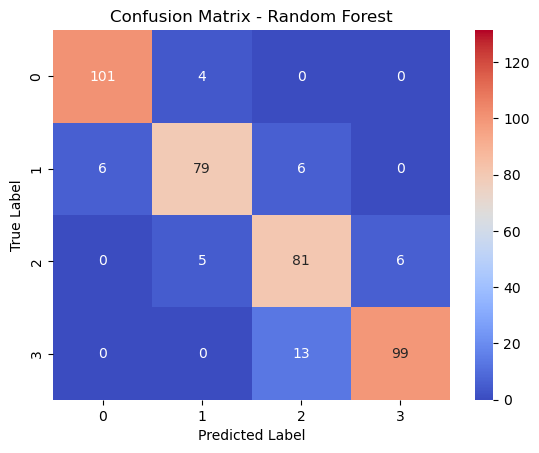

In [13]:

# Random Forest Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)

# Find the maximum value in the confusion matrix for scaling
max_val = cm_rf.max()

# Visualizing the Confusion Matrix
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="coolwarm", vmin=0, vmax=max_val * 1.3)  
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()